In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier ,VotingClassifier
from sklearn.tree import DecisionTreeClassifier


In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
data = pd.read_csv(r"C:\Users\user\Documents\Healthcare-Diabetes.csv")

In [8]:
data

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [9]:
data = data.drop(['Id'] , axis =1)

In [10]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


In [13]:
data = data.rename(columns = {'DiabetesPedigreeFunction':'DPF'})

In [14]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


In [22]:
data = data.rename(columns = {'SkinThickness':'Skin_THICK'})

In [23]:
data

,Pregnancies,Glucose,BloodPressure,Skin_THICK,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    2768 non-null   int64  
 1   Glucose        2768 non-null   int64  
 2   BloodPressure  2768 non-null   int64  
 3   Skin_THICK     2768 non-null   int64  
 4   Insulin        2768 non-null   int64  
 5   BMI            2768 non-null   float64
 6   DPF            2768 non-null   float64
 7   Age            2768 non-null   int64  
 8   Outcome        2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [25]:
data.describe()

,Pregnancies,Glucose,BloodPressure,Skin_THICK,Insulin,BMI,DPF,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [27]:
data.corr()

,Pregnancies,Glucose,BloodPressure,Skin_THICK,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.122839,0.147253,-0.068673,-0.075734,0.018761,-0.027731,0.540805,0.223796
Glucose,0.122839,1.000000,0.142095,0.061023,0.323445,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.147253,0.142095,1.000000,0.201167,0.087823,0.281560,0.048471,0.238684,0.072900
Skin_THICK,-0.068673,0.061023,0.201167,1.000000,0.445345,0.393494,0.179830,-0.111895,0.075603
Insulin,-0.075734,0.323445,0.087823,0.445345,1.000000,0.215926,0.190500,-0.073458,0.123646
BMI,0.018761,0.225308,0.281560,0.393494,0.215926,1.000000,0.129766,0.038175,0.280928
DPF,-0.027731,0.127195,0.048471,0.179830,0.190500,0.129766,1.000000,0.028544,0.160664
Age,0.540805,0.256958,0.238684,-0.111895,-0.073458,0.038175,0.028544,1.000000,0.237050
Outcome,0.223796,0.460644,0.072900,0.075603,0.123646,0.280928,0.160664,0.237050,1.000000


<Axes: >

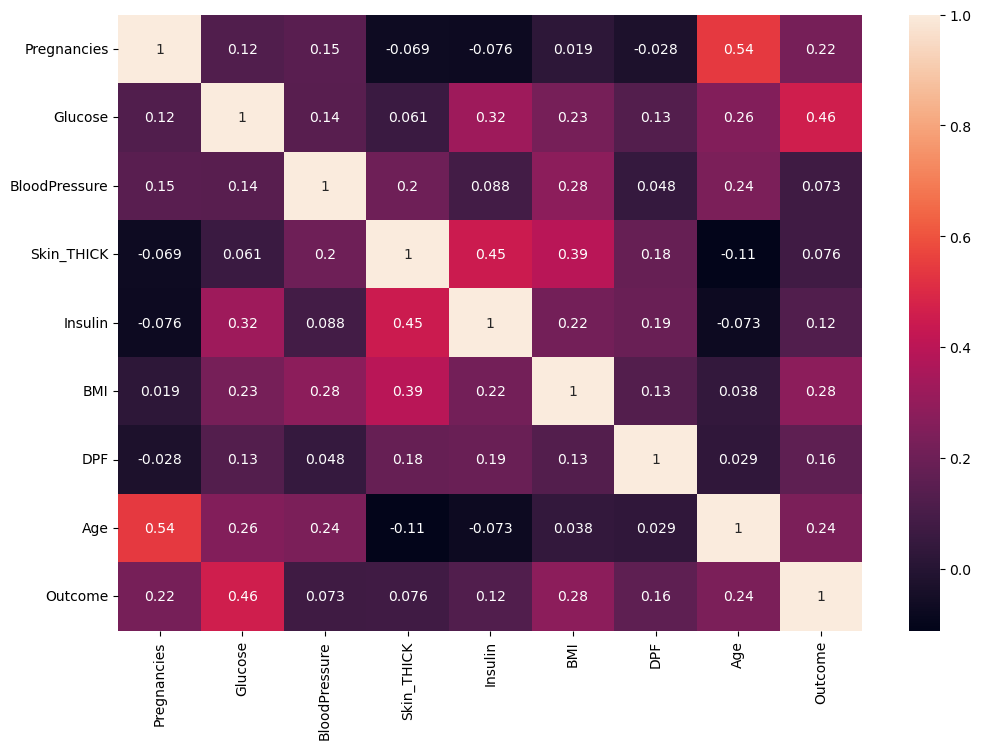

In [29]:
plt.figure(figsize = (12,8))
sn.heatmap(data.corr() , annot = True)

<Axes: >

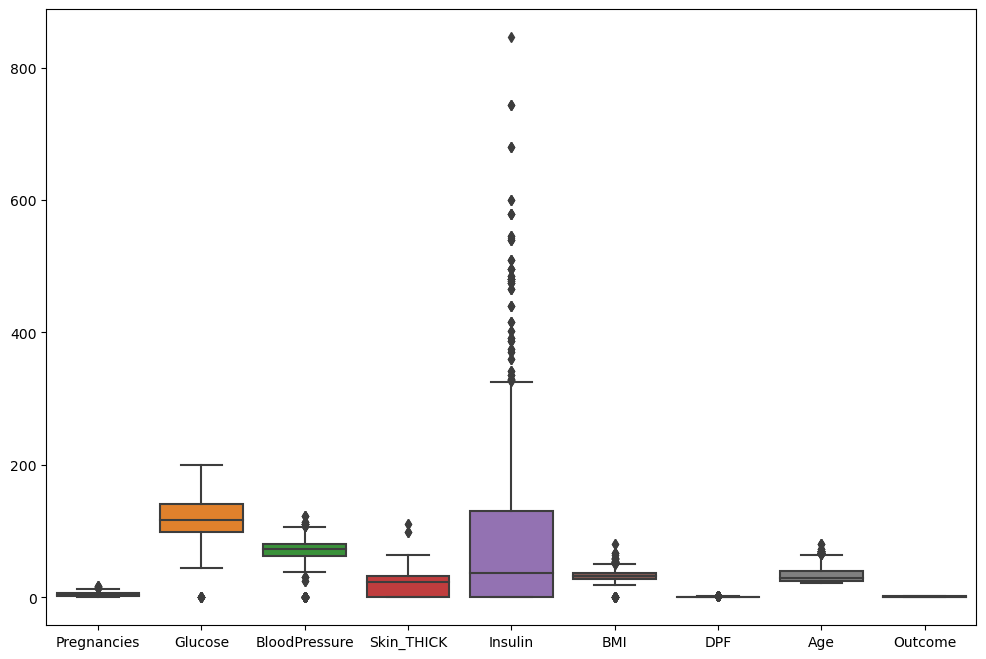

In [31]:
plt.figure(figsize = (12,8))
sn.boxplot(data)

C:\Users\user\AppData\Local\Temp\ipykernel_14020\2235976101.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

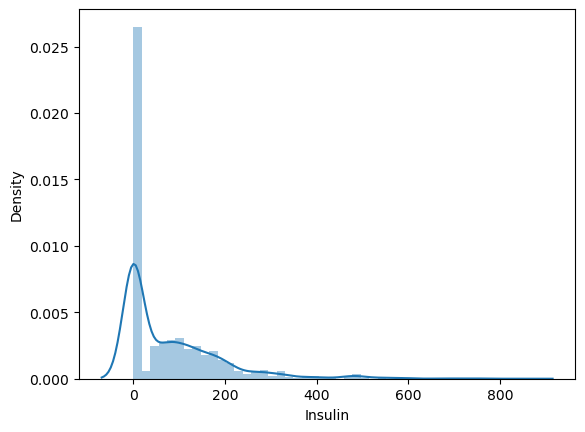

In [32]:
sn.distplot(data['Insulin'])

In [33]:
data['Insulin'].skew()

2.078110809650225

In [35]:
Q3 = data['Insulin'].quantile(0.75)
Q1 = data['Insulin'].quantile(0.25)
IQR = Q3-Q1

In [39]:
IQR , Q1 , Q3

(130.0, 0.0, 130.0)

In [37]:
upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR

In [40]:
upper_bound

325.0

In [41]:
data = data[~((data.Insulin>upper_bound))]

In [42]:
data

,Pregnancies,Glucose,BloodPressure,Skin_THICK,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


In [43]:
data['Insulin'].isnull().sum()

0

<Axes: >

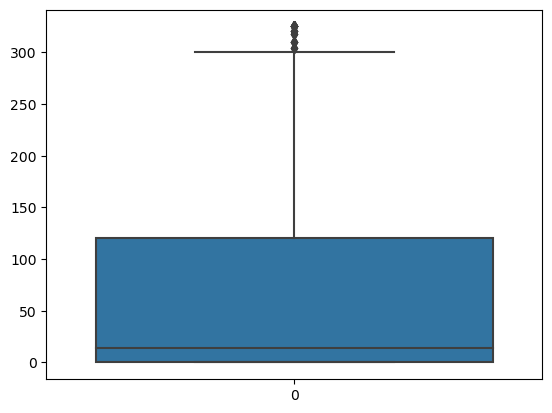

In [45]:
sn.boxplot(data['Insulin'])

In [49]:
q3 = data['Insulin'].quantile(0.75)
Upper_bound = q3+1.5*IQR

In [50]:
Upper_bound

315.0

In [51]:
data = data[~((data.Insulin>Upper_bound))]

In [52]:
data

,Pregnancies,Glucose,BloodPressure,Skin_THICK,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


<Axes: >

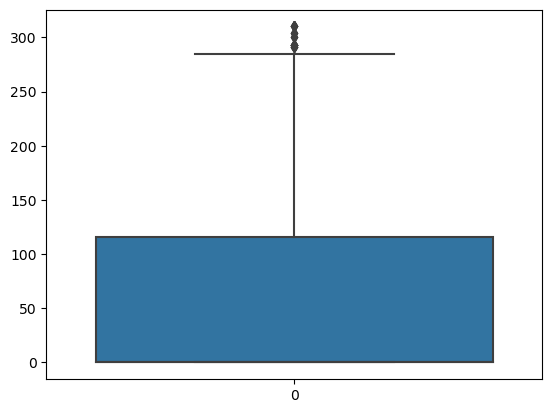

In [53]:
sn.boxplot(data['Insulin'])

In [54]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
UPPER_BOUND = q3+1.5*iqr
LOWER_BOUND = q1-1.5*iqr
data = data[~((data>UPPER_BOUND)|(data<LOWER_BOUND)).any(axis=1)]


In [55]:
data

,Pregnancies,Glucose,BloodPressure,Skin_THICK,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
2762,1,79,60,42,48,43.5,0.678,23,0
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0


{'whiskers': [<matplotlib.lines.Line2D at 0x20d73919ab0>,
 'caps': [<matplotlib.lines.Line2D at 0x20d73760cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d73919810>,
 'medians': [<matplotlib.lines.Line2D at 0x20d7391a1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x20d7391a470>,
 'means': []}

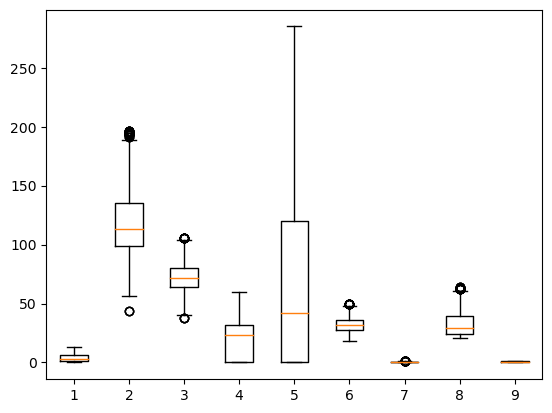

In [56]:
plt.boxplot(data)

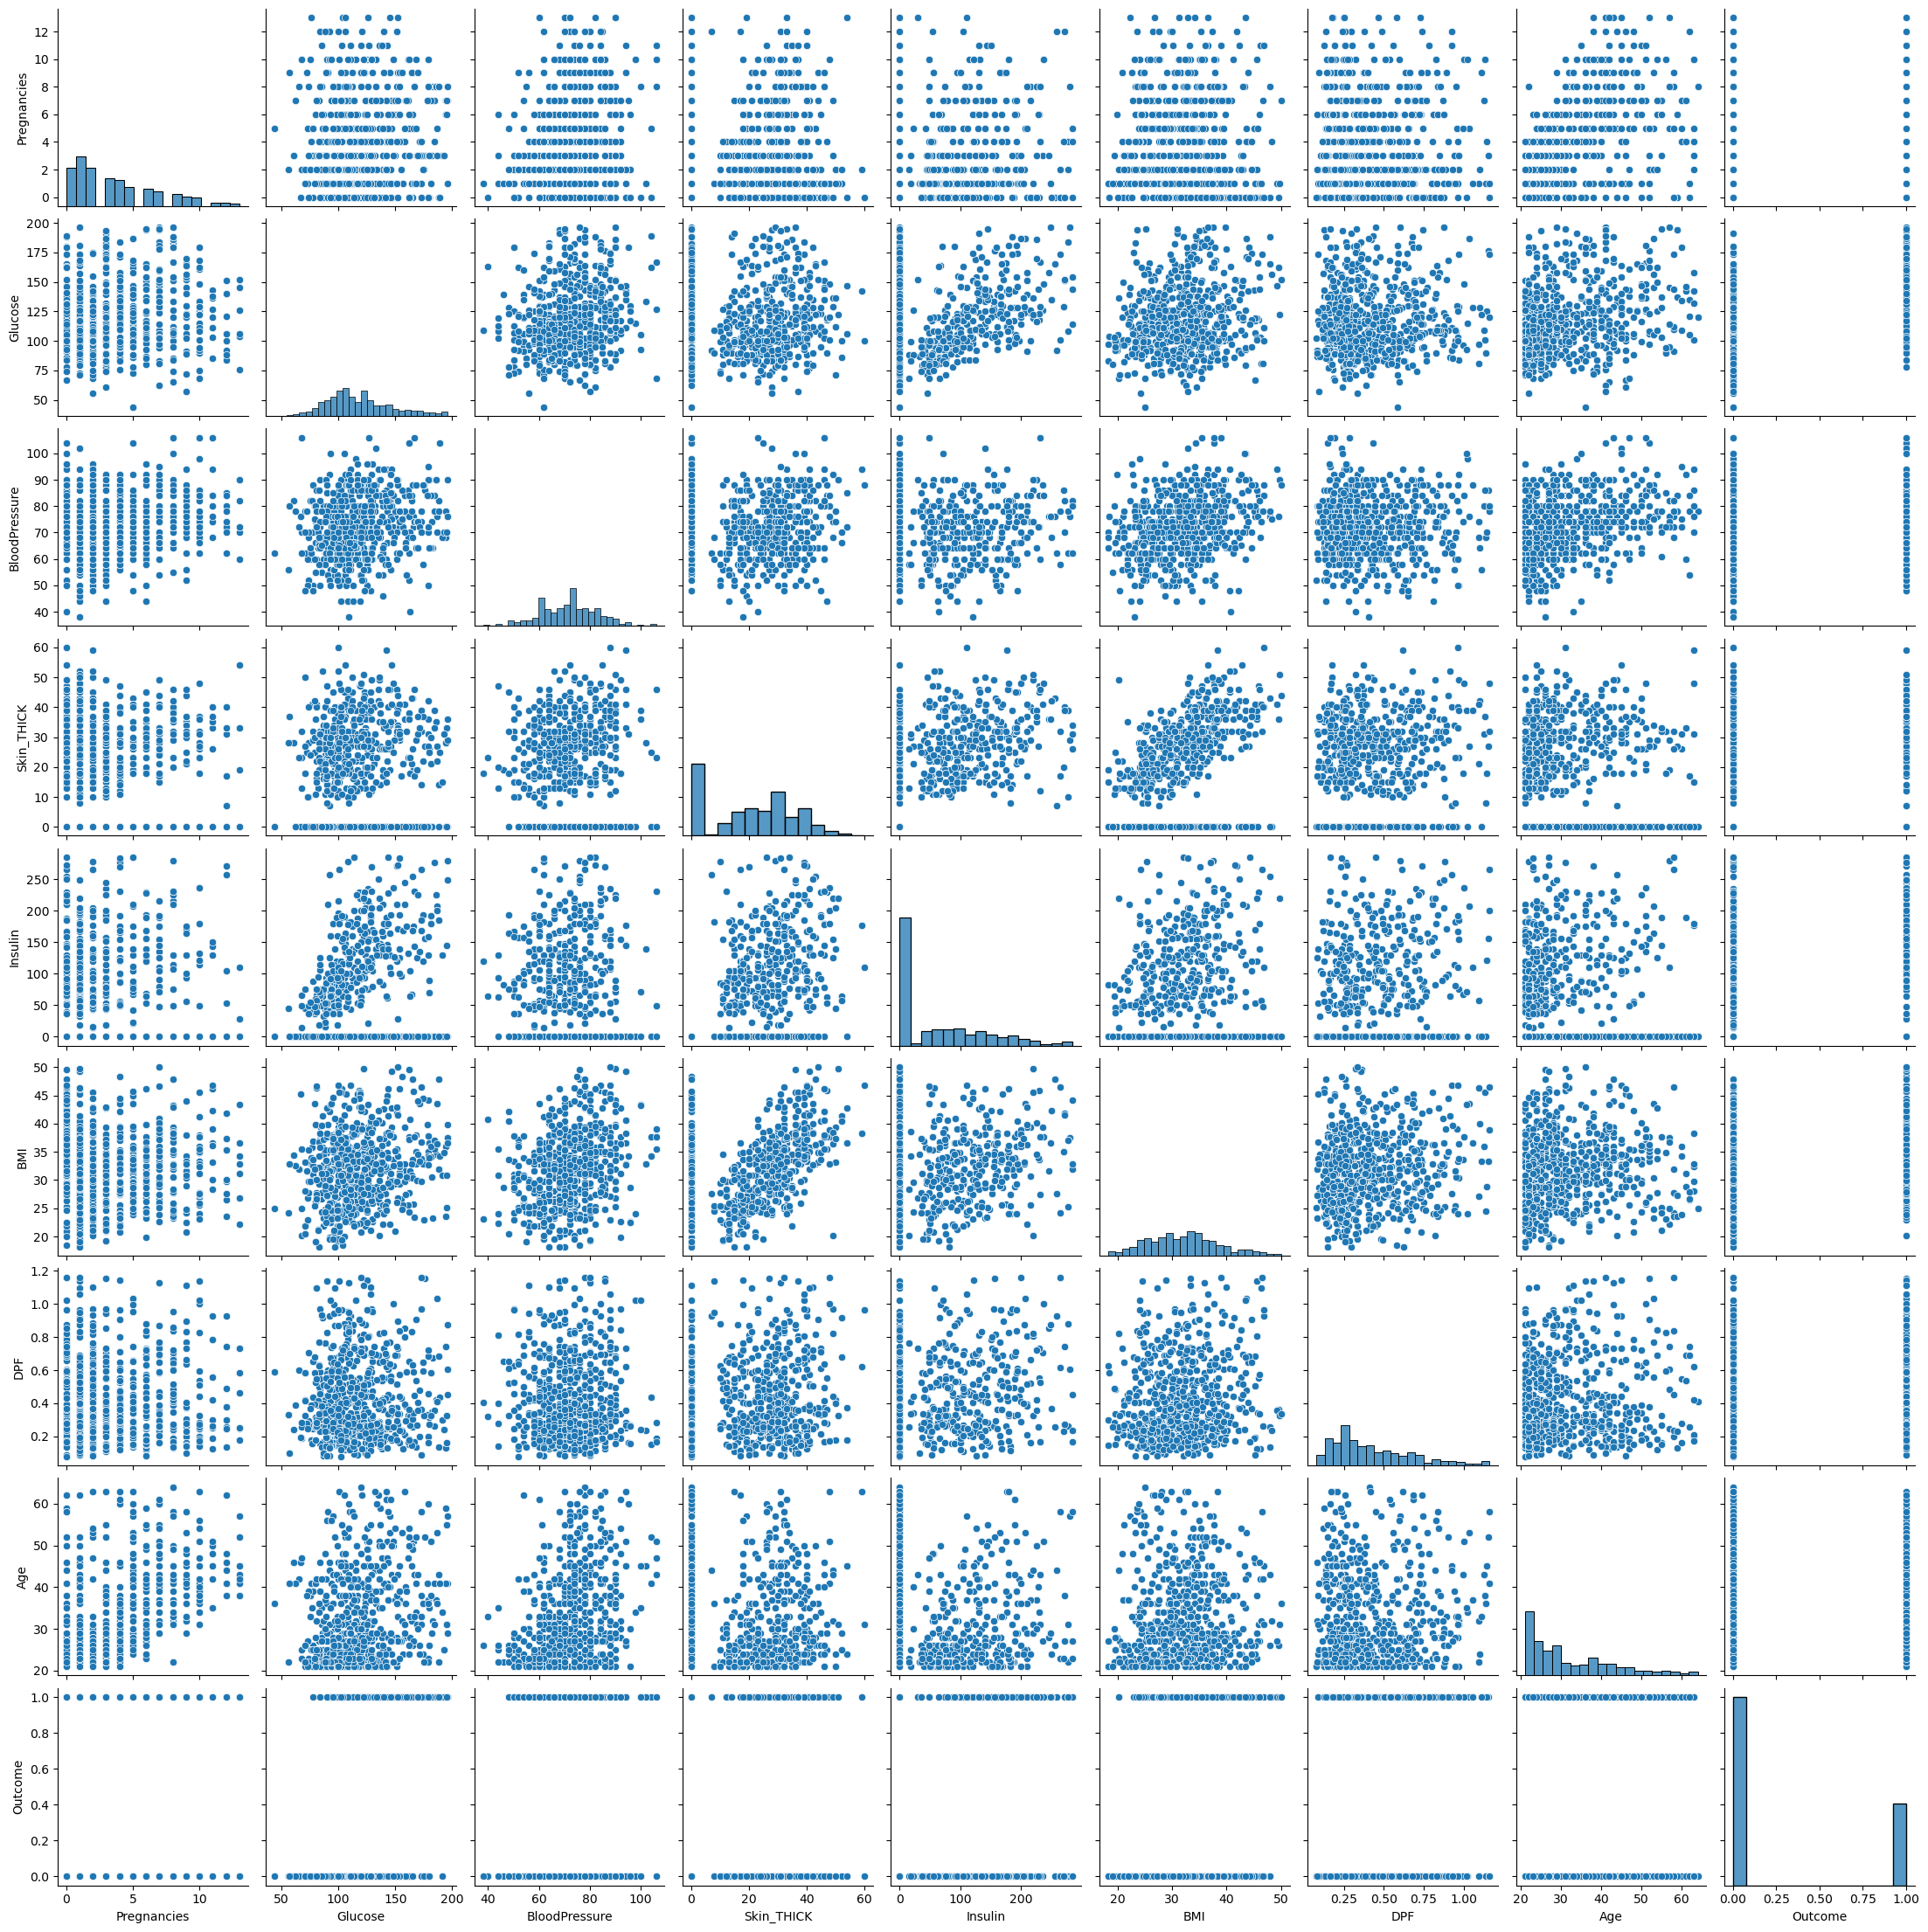

In [57]:
sn.pairplot(data)

C:\Users\user\AppData\Local\Temp\ipykernel_14020\2647630002.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['Insulin'],label='skew'+str(np.round(data['Insulin'].skew(),2)))


<Axes: xlabel='Insulin', ylabel='Density'>

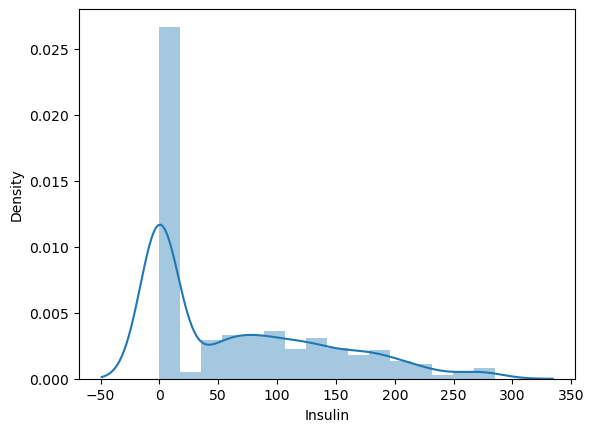

In [59]:
sn.distplot(data['Insulin'],label='skew'+str(np.round(data['Insulin'].skew(),2)))

In [64]:
from scipy import stats

((array([-3.42336503, -3.17442878, -3.0364736 , ...,  3.0364736 ,
          3.17442878,  3.42336503]),
  array([  0,   0,   0, ..., 285, 285, 285], dtype=int64)),
 (69.39755025886396, 65.28067826863006, 0.9055032314739743))

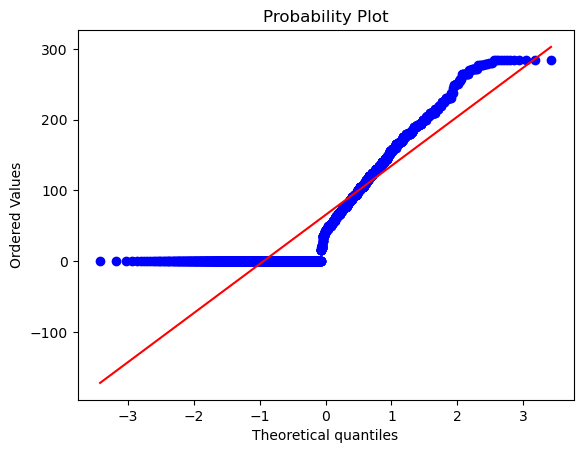

In [70]:
stats.probplot(data['Insulin'], plot=plt)

((array([-3.42336503, -3.17442878, -3.0364736 , ...,  3.0364736 ,
          3.17442878,  3.42336503]),
  array([ 44,  44,  44, ..., 196, 196, 196], dtype=int64)),
 (28.1443134140349, 118.1503792949576, 0.983736570557006))

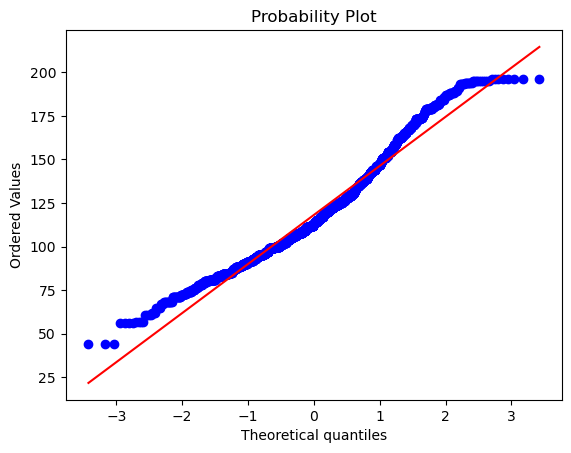

In [71]:
stats.probplot(data['Glucose'] , plot=plt)

((array([-3.42336503, -3.17442878, -3.0364736 , ...,  3.0364736 ,
          3.17442878,  3.42336503]),
  array([ 38,  38,  38, ..., 106, 106, 106], dtype=int64)),
 (11.30817414079162, 71.93529674252567, 0.9975638637356202))

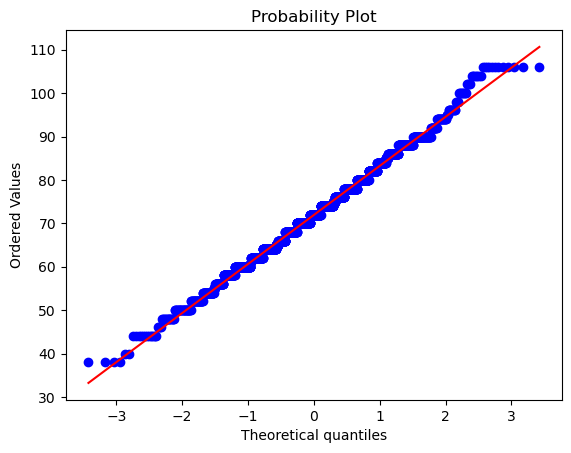

In [73]:
stats.probplot(data['BloodPressure'] , plot = plt)

In [74]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Skin_THICK', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

((array([-3.42336503, -3.17442878, -3.0364736 , ...,  3.0364736 ,
          3.17442878,  3.42336503]),
  array([ 0,  0,  0, ..., 13, 13, 13], dtype=int64)),
 (3.032326299352656, 3.656849620705042, 0.9495989642410064))

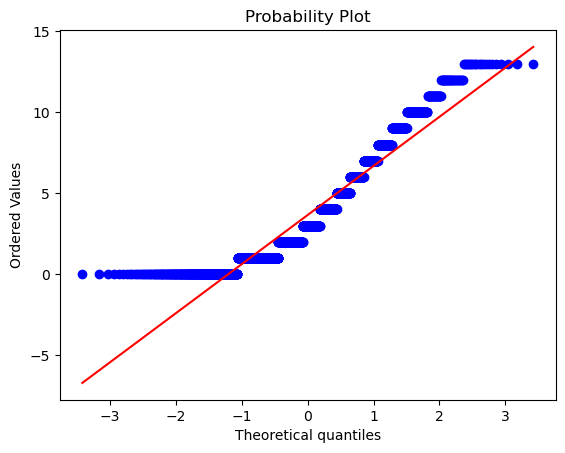

In [75]:
stats.probplot(data['Pregnancies'] , plot = plt)

<Axes: xlabel='BloodPressure', ylabel='Count'>

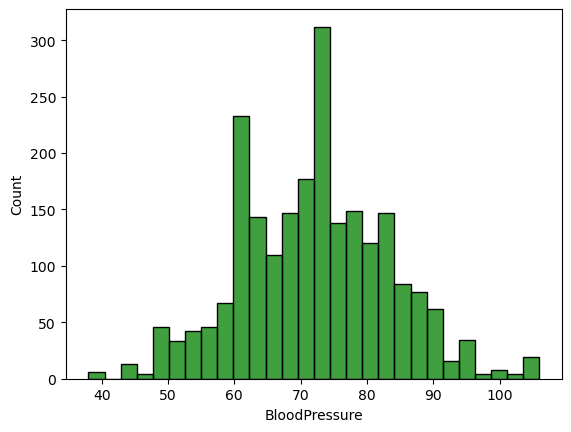

In [76]:
sn.histplot(data['BloodPressure'] , color = 'green')

<Axes: xlabel='BMI', ylabel='BloodPressure'>

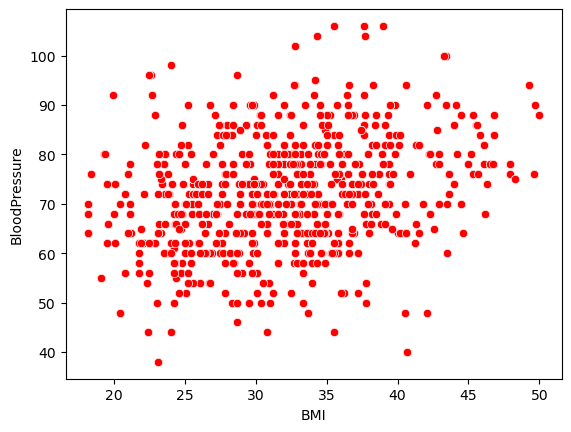

In [78]:
sn.scatterplot(x = 'BMI' , y = 'BloodPressure' , data = data , color = 'red')

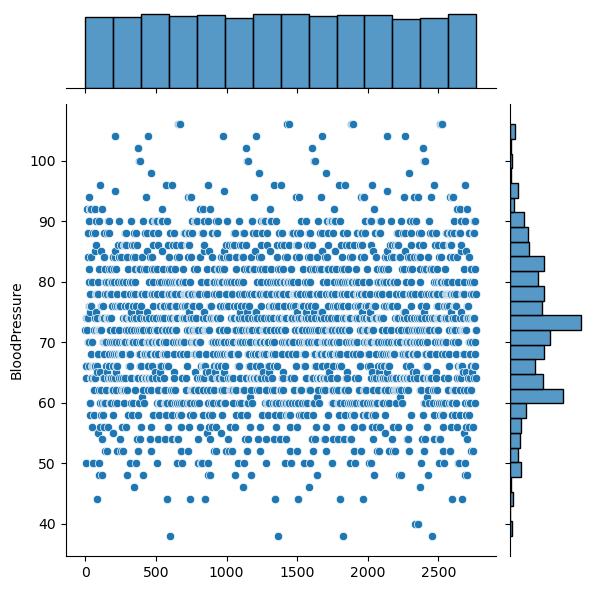

In [82]:
sn.jointplot(data['BloodPressure'])

In [83]:
x = data.drop(['Outcome'] , axis = 1)
y = data['Outcome']

In [84]:
x.head()

,Pregnancies,Glucose,BloodPressure,Skin_THICK,Insulin,BMI,DPF,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [85]:
y.head

<bound method NDFrame.head of 0       1
1       0
2       1
3       0
5       0
       ..
2762    0
2763    0
2764    1
2765    0
2767    0
Name: Outcome, Length: 2241, dtype: int64>

In [86]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [87]:
X = norm_func(x)

In [88]:
X

,Pregnancies,Glucose,BloodPressure,Skin_THICK,Insulin,BMI,DPF,Age
0,0.461538,0.684211,0.500000,0.583333,0.000000,0.484277,0.506458,0.674419
1,0.076923,0.269737,0.411765,0.483333,0.000000,0.264151,0.251845,0.232558
2,0.615385,0.914474,0.382353,0.000000,0.000000,0.160377,0.547970,0.255814
3,0.076923,0.296053,0.411765,0.383333,0.329825,0.311321,0.082103,0.000000
5,0.384615,0.473684,0.529412,0.000000,0.000000,0.232704,0.113469,0.209302
...,...,...,...,...,...,...,...,...
2762,0.076923,0.230263,0.323529,0.700000,0.168421,0.795597,0.553506,0.046512
2763,0.153846,0.203947,0.382353,0.400000,0.192982,0.361635,0.269373,0.279070
2764,0.615385,0.888158,0.500000,0.700000,0.456140,0.455975,0.591328,0.348837
2765,0.461538,0.269737,0.588235,0.000000,0.000000,0.408805,0.280443,0.488372


In [89]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.20  , random_state = 42)

In [90]:
x_train.shape , x_test.shape

((1792, 8), (449, 8))

In [91]:
model = LogisticRegression()

In [92]:
model.fit(x_train,y_train)

LogisticRegression()

In [93]:
y_pred = model.predict(x_test)

In [94]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [95]:
accuracy_model = accuracy_score(y_pred , y_test)

In [96]:
accuracy_model

0.8040089086859689

In [97]:
classification_result = classification_report(y_pred , y_test)

In [99]:
print(classification_result)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       345
           1       0.56      0.76      0.64       104

    accuracy                           0.80       449
   macro avg       0.74      0.79      0.75       449
weighted avg       0.83      0.80      0.81       449



<Axes: >

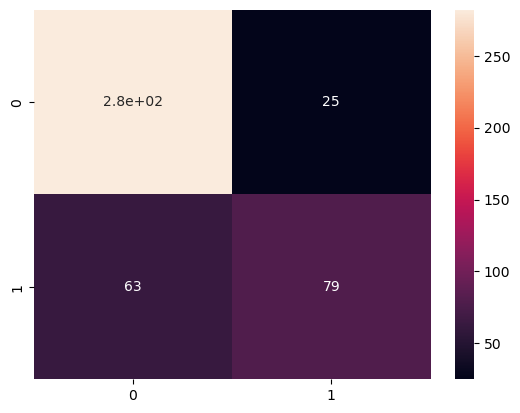

In [100]:
cm = confusion_matrix(y_test ,y_pred)
sn.heatmap(cm , annot = True)

In [101]:
model_tree = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3)

In [102]:
model_tree.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [104]:
y_pred_tree = model_tree.predict(x_test)

In [105]:
y_pred_tree

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [109]:
compaire_model = pd.DataFrame({'Actual':y_test , 'Predicted':y_pred})

In [110]:
compaire_model

,Actual,Predicted
973,0,0
1121,0,0
1905,0,0
304,0,0
2360,1,1
...,...,...
583,0,0
1522,1,1
2739,0,0
766,1,0


In [112]:
compair_tree = pd.DataFrame({'Actual':y_test , 'Predicted':y_pred_tree})

In [114]:
compair_tree

,Actual,Predicted
973,0,0
1121,0,0
1905,0,0
304,0,0
2360,1,1
...,...,...
583,0,0
1522,1,1
2739,0,0
766,1,0


In [115]:
accuracy_tree = accuracy_score(y_test ,y_pred)

In [116]:
accuracy_tree

0.77728285077951

In [118]:
model_random = RandomForestClassifier(n_estimators = 100 , max_features = 3)

In [119]:
model_random.fit(x_train , y_train)

RandomForestClassifier(max_features=3)

In [120]:
y_random = model_random.predict(x_test)

In [121]:
y_random

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [124]:
accuracy_random = accuracy_score(y_random , y_test)

In [125]:
accuracy_random

0.9933184855233853

In [126]:
compair_random = pd.DataFrame({'actual':y_test,'predicted':y_random})

In [127]:
compair_random

,actual,predicted
973,0,0
1121,0,0
1905,0,0
304,0,0
2360,1,1
...,...,...
583,0,0
1522,1,1
2739,0,0
766,1,1


## Hyperparameter Tuning

In [128]:
from sklearn.model_selection import GridSearchCV

In [135]:
param_grid = {'n_estimators':[100,150,200,250],
               'max_depth':[5,7,10,12],
                'max_features':[3,5,7]}

In [136]:
model_grid = GridSearchCV(estimator = model_random , param_grid = param_grid , cv = 5)

In [137]:
model_grid.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_features=3),
             param_grid={'max_depth': [5, 7, 10, 12], 'max_features': [3, 5, 7],
                         'n_estimators': [100, 150, 200, 250]})

In [144]:
y_pred_grid = model_grid.predict(x_test)

In [145]:
y_pred_grid

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [147]:
accuracy_score = accuracy_score(y_test , y_pred_grid)

In [148]:
accuracy_score

0.9933184855233853

In [149]:
classification_report = classification_report(y_test , y_pred_grid)

In [151]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       307
           1       1.00      0.98      0.99       142

    accuracy                           0.99       449
   macro avg       1.00      0.99      0.99       449
weighted avg       0.99      0.99      0.99       449



In [152]:
best_param = model_grid.best_params_

In [153]:
best_param

{'max_depth': 12, 'max_features': 3, 'n_estimators': 200}